In [16]:
import pandas as pd
import sqlite3

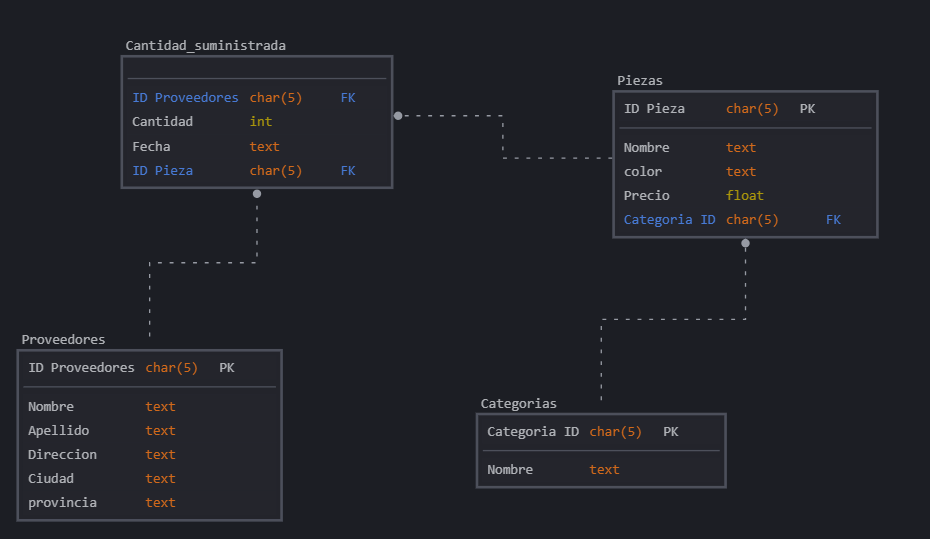

In [61]:
connection = sqlite3.connect('./Base_de_datos.db')

In [62]:
cursor_gestion = connection.cursor()

In [54]:
def query_sql(query):
    return pd.read_sql(query, connection)

In [63]:
query_create_proveedores = '''
CREATE TABLE Proveedores (
ID_PROVEEDORES   CHAR(5) PRIMARY KEY,
NOMBRE           TEXT NOT NULL,
APELLIDO         TEXT NOT NULL,
DIRECCION        TEXT NOT NULL,
CIUDAD           TEXT NOT NULL,
PROVINCIA        TEXT NOT NULL
)
'''
cursor_gestion.execute(query_create_proveedores)

In [64]:
query_create_cantidad_suministrada = '''
CREATE TABLE Cantidad_suministrada (
ID_PROVEEDORES   CHAR(5),
CANTIDAD         INT NOT NULL,
FECHA            TEXT NOT NULL,
ID_PIEZA         CHAR(5),
FOREIGN KEY(ID_PROVEEDORES) REFERENCES Proveedores(ID_PROVEEDORES)
)
'''
cursor_gestion.execute(query_create_cantidad_suministrada)

In [65]:
query_create_piezas = '''
CREATE TABLE Piezas (
ID_PIEZA     CHAR(5) PRIMARY KEY,
NOMBRE       TEXT NOT NULL,
COLOR        TEXT NOT NULL,
PRECIO       FLOAT NOT NULL,
CATEGORIA_ID    CHAR(5),
FOREIGN KEY(ID_PIEZA) REFERENCES Cantidad_suministrada(ID_PIEZA)
)
'''

cursor_gestion.execute(query_create_piezas)

In [66]:
query_create_categorias = '''
CREATE TABLE Categorias (
CATEGORIA_ID     CHAR(5) PRIMARY KEY,
NOMBRE           TEXT NOT NULL,
FOREIGN KEY(CATEGORIA_ID) REFERENCES Piezas(CATEGORIA_ID)
)
'''
cursor_gestion.execute(query_create_categorias)

In [ ]:
#Datos de la tabla Proveedores

proveedores = {
    'MASA3': ('Manuel', 'Sanchez', 'Calle Cantabria, 9', 'Badalona', 'Barcelona'),
    'PEPI1': ('Pedro', 'Picapierdas', 'Calle Roger de Flor, 124', 'Barcelona', 'Barcelona'),
    'VIGA2': ('Victor', 'Garcia', 'Avenida Catalina, 56', 'Albarracin','Teruel'),
    'RUDI4': ('Ruben', 'Diaz', 'Calle de los vientos, 97', 'Guadalupe', 'Caceres')
    'CACA5': ('Carla', 'Castellano', 'Camino sant jeronimo del rio, 845', 'Frias', 'Burgos'),
    'LAHE6': ('Laura', 'Hernandez', 'Avenida del comarca, 13', 'Vivero', 'Lugo')
}


for identificador, datos in proveedores.items():
    nombre = datos[0]
    apellido = datos[1]
    direccion = datos[2]
    ciudad = datos[3]
    provincia = datos[4]
    query = f'''
    INSERT INTO Proveedores (ID_PROVEEDORES, NOMBRE, APELLIDO, DIRECCION, CIUDAD, PROVINCIA)
    VALUES ('{identificador}', '{nombre}', '{apellido}', '{direccion}', '{ciudad}', '{provincia}')
    '''
    cursor_gestion.execute(query)
    

In [ ]:
#Datos de la tabla de Cantidad_suministrada



In [56]:
#Datos de la tabla Piezas

piezas = {
    "0001A": ("Rueda", "Negro", 50, "Recambios", "01.02.2023"),
    "0002B": ("Sillin", "Negro", 35, "Suministros", "02.04.2025"),
    "0003C": ("Manillar", "Metálico", 80, "Suministros", "08.12.2021"),
    "0004D": ("Casco", "Blanco", 40, "Elemento Seguridad", "09.11.2024"),
    "0005E": ("Suspension", "Metálico", 25, "Suministros", "27.10.2023"),
    "0006F": ("Maillot", "Amarillo", 55, "Vestuario", "11.05.2024"),
    "0007G": ("Guantes", "Azul", 20, "Vestuario", "16.02.2025"),
    "0008H": ("Zapatillas", "Rojo", 60, "Vestuario", "18.04.2024"),
    "0009I": ("Gafas", "Negro", 45, "Vestuario", "20.09.2024"),
    "0010J": ("Luces", "Rojo", 15, "Elemento Seguridad", "14.06.2023")
}

for indice,(nombre, valores) in enumerate(piezas.items()):
    ID_Pieza = valores[0]
    Color = valores[1]
    Precio = valores[2]
    Categoria = valores [3]
    Fecha_suministro = valores [4]
    query= f'''
    INSERT INTO Piezas (ID_PIEZA, NOMBRE, COLOR, PRECIO, FECHA, CATEGORIA_ID) 
    VALUES ('{nombre}', '{ID_Pieza}', '{Color}', {Precio}, '{Fecha_suministro}' ,'{Categoria}')
    '''
    
    cursor_gestion.execute(query)

In [ ]:
#Datos de la tabla Categorías

'''
RE = recambio
VE = vestuario
SE = seguridad
'''

In [ ]:
query = '''
SELECT *
FROM sqlite_master
WHERE type = 'table'
'''

cursor_gestion.execute(query)
cursor_gestion.fetchall()

In [68]:
cursor_gestion.close()

In [69]:
connection.close()